# **Heart Failure Prediction**
Dataset obtained from: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

With 918 unique instances, the dataset encompasses the following attributes critical to predicting heart failure:

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

---

# Requirements

In [109]:
# Baisc dataframe and array manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# Model performance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from mlxtend.plotting import plot_confusion_matrix

# Logistic regression
from sklearn.linear_model import LogisticRegression

# Random forest
from sklearn.ensemble import RandomForestClassifier

# SVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Gridsearch
from sklearn.model_selection import GridSearchCV

# Ensemble learning
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Warnings
import warnings

In [8]:
# add dataset to the content directory on the left
df = pd.read_csv('./heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
# shuffling the data
df_shuffled = shuffle(df, random_state=42)
df_shuffled.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
668,63,F,ATA,140,195,0,Normal,179,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
377,65,M,ASY,160,0,1,ST,122,N,1.2,Flat,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1
807,54,M,ATA,108,309,0,Normal,156,N,0.0,Up,0


In [10]:
df_shuffled.shape

(918, 12)

### Summary statistics

In [11]:
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 668 to 102
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.2+ KB


In [12]:
df_shuffled["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [13]:
df_shuffled.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
df_shuffled.describe(include=object)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [15]:
df_shuffled.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Encoding categorical columns

In [16]:
numerical_columns = df_shuffled.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [17]:
categorical_columns = df_shuffled.select_dtypes(include=['object']).columns
categorical_columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [19]:
label_encoder = LabelEncoder()

df_shuffled[categorical_columns] = df_shuffled[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

In [20]:
df_shuffled

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
668,63,0,1,140,195,0,1,179,0,0.0,2,0
30,53,1,2,145,518,0,1,130,0,0.0,1,1
377,65,1,0,160,0,1,2,122,0,1.2,1,1
535,56,1,0,130,0,0,0,122,1,1.0,1,1
807,54,1,1,108,309,0,1,156,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,48,0,0,120,254,0,2,110,0,0.0,2,0
270,45,1,0,120,225,0,1,140,0,0.0,2,0
860,60,1,0,130,253,0,1,144,1,1.4,2,1
435,60,1,0,152,0,0,2,118,1,0.0,2,0


### Visualization

#### Histograms

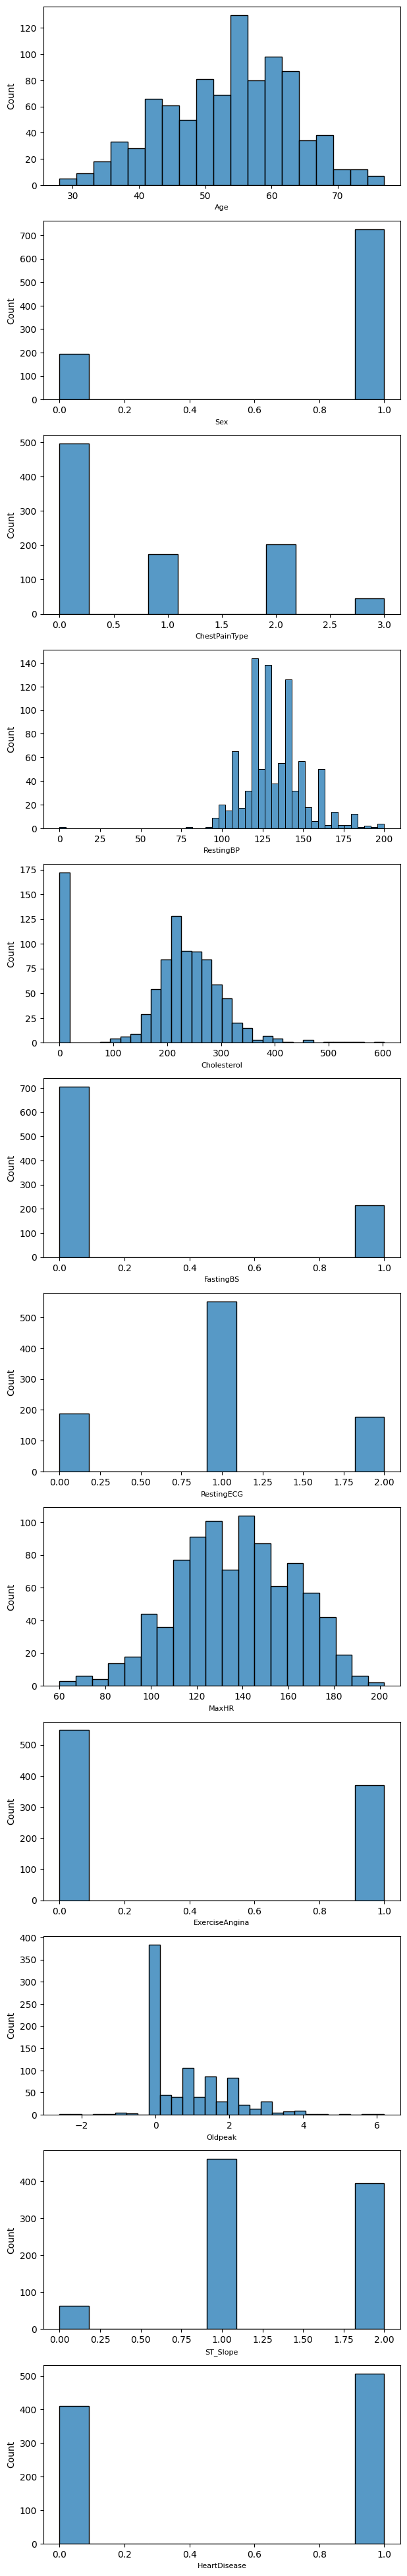

In [21]:
# visualization of all attributes (including categorical ones)
fig, ax = plt.subplots(len(df_shuffled.columns), figsize = (7,50))

for i, feature in enumerate(df_shuffled.columns):
  sns.histplot(df_shuffled[feature], ax=ax[i])
  ax[i].set_xlabel(feature, fontsize=8)
plt.show()

#### Categorical attributes

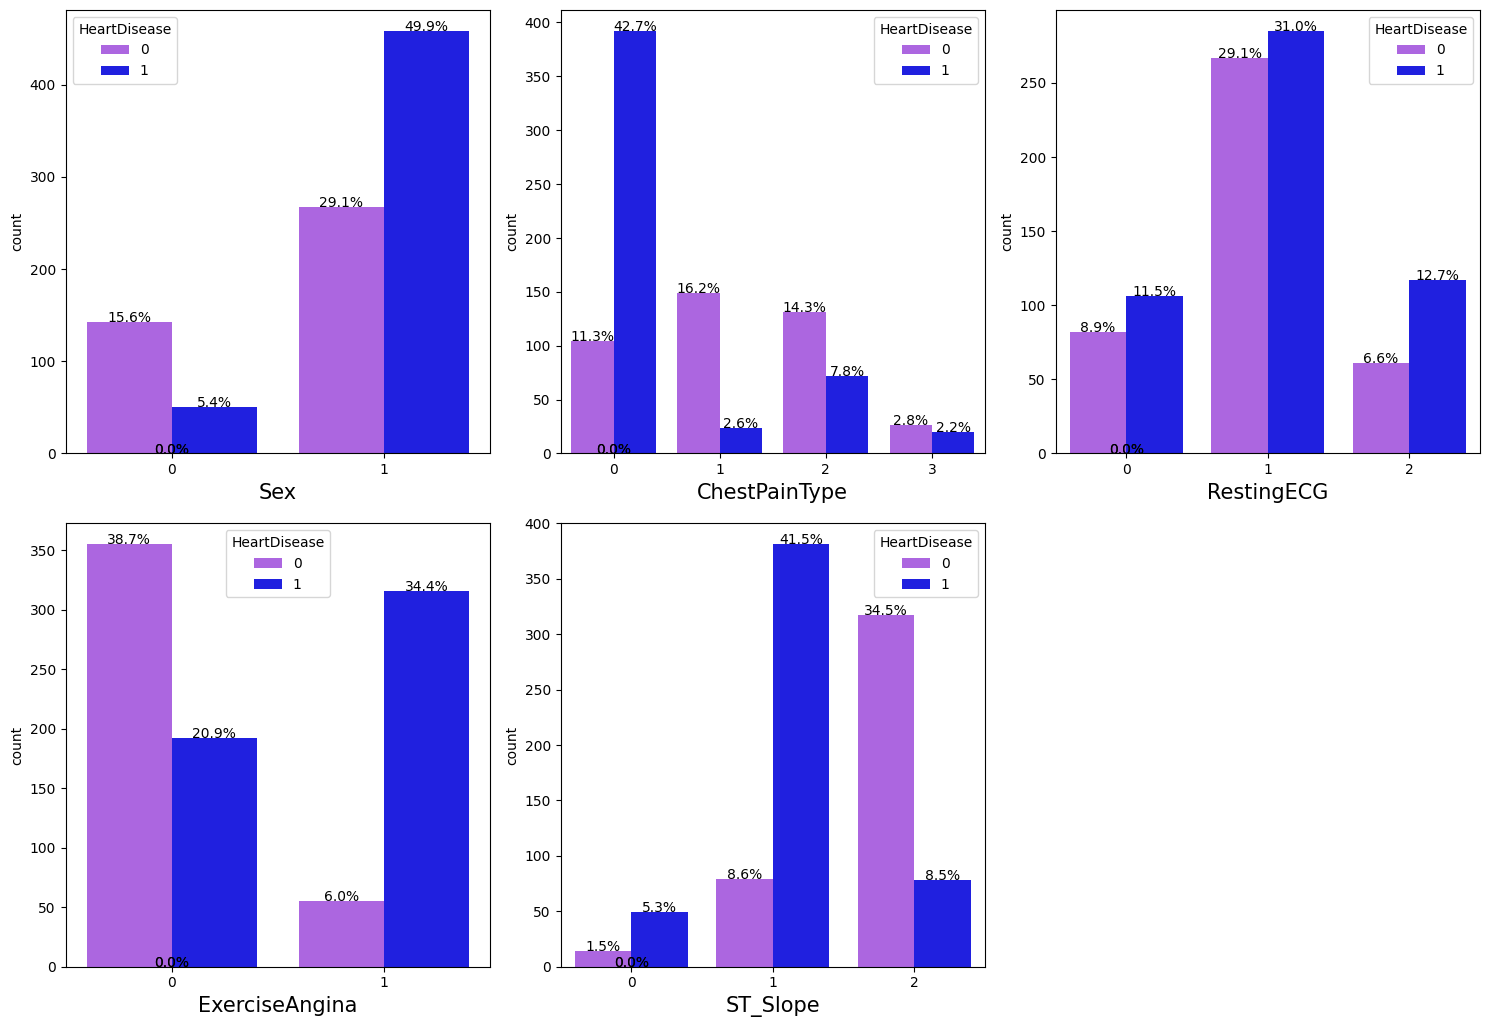

In [22]:
plt.figure(figsize=(15, 15))
custom_palette = {0: '#af52f4', 1: 'blue'}

for i, cat_var in enumerate(categorical_columns, start=1):
    plt.subplot(3, 3, i)
    sns.countplot(x=cat_var, hue='HeartDisease', data=df_shuffled, palette=custom_palette)
    ax = plt.gca()
    total = len(df_shuffled)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')
    plt.xlabel(cat_var, fontsize=15)

plt.tight_layout()
plt.show()


#### Box plot and violin combo for continuous attributes

In [24]:
continuous_cols = []
categorical_threshold = 3

for col in df_shuffled.columns:
    unique_values = df_shuffled[col].nunique()
    if unique_values > categorical_threshold:
        continuous_cols.append(col)
continuous_cols

['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

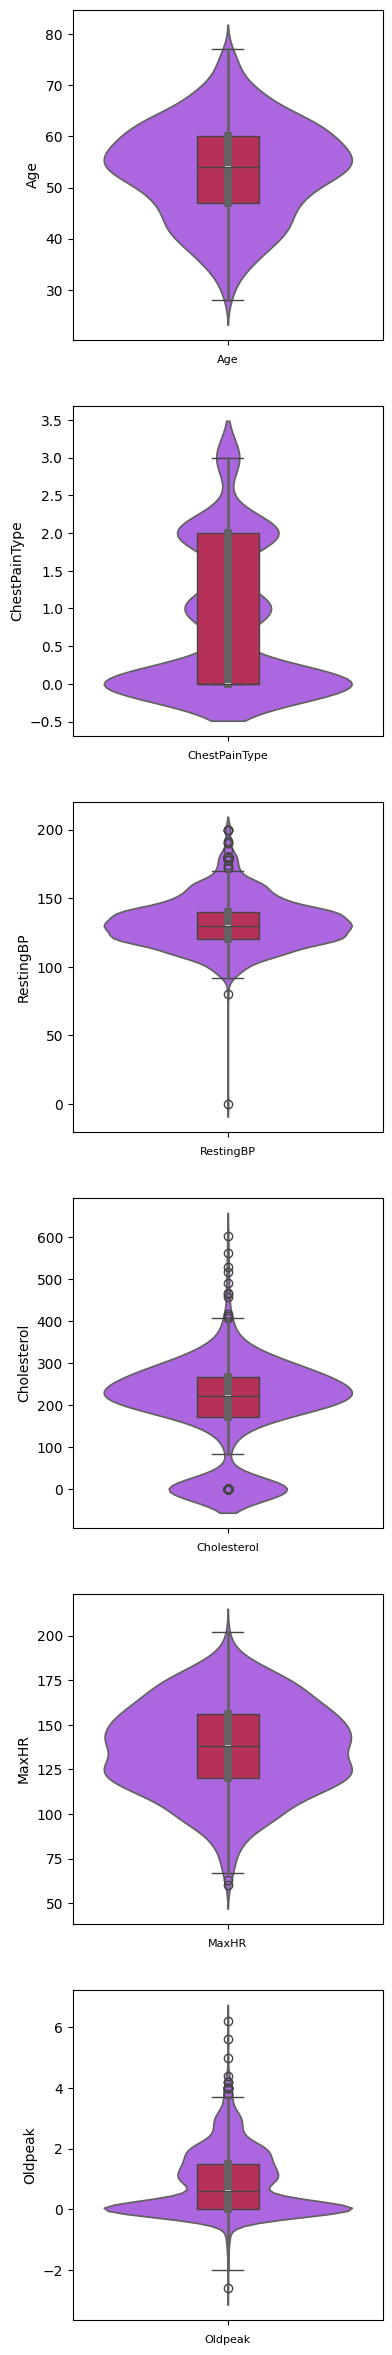

In [28]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualizing numerical continuous features
fig, ax = plt.subplots(len(continuous_cols), figsize = (4,30))

for i, feature in enumerate(continuous_cols):
  sns.boxplot(y= df_shuffled[feature], ax=ax[i], boxprops={'zorder': 2}, width=0.2, palette='rocket')
  sns.violinplot(y= df_shuffled[feature], ax=ax[i], color = "#af52f4")
  ax[i].set_xlabel(feature, fontsize=8)
plt.show()

### Special treatment: removing outliers

*   The first measure of special treatment was performed above by encoding some of the categorical attributes (i.e., Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope).
*   Now, from the statistical description and the visualization, it seems that attributes `RestingBP`, `Cholesterol`, and `Oldpeak` have some outliers.
*   Those outliers can be treated by removing their corresponding entries/rows .
* Such rows can be removed because there is only so few of them. For `Cholesterol` and `Oldpeak` it looks like there are so many zero-valued instances. After thorough research and trials, those values better not be imputed or tampered with because so many rows would be affected. The sheer number of instances indicates that the 0 values could not be the result of data entry errors. For `Cholesterol`, the 0 values are taken to imply extreme low cholesterol levels (values between 0 and 1 that could not be appropriately represented since the feature is an integer).


In [29]:
print("Before removing outliers:", df_shuffled.shape)

Before removing outliers: (918, 12)


In [30]:
df_shuffled = df_shuffled[df_shuffled['Cholesterol'] <= 500]
df_shuffled = df_shuffled[df_shuffled['RestingBP'] > 85]
df_shuffled = df_shuffled[df_shuffled['Oldpeak'] >= 0]
print("After removing outliers:", df_shuffled.shape)

After removing outliers: (899, 12)


### Scatter matrix

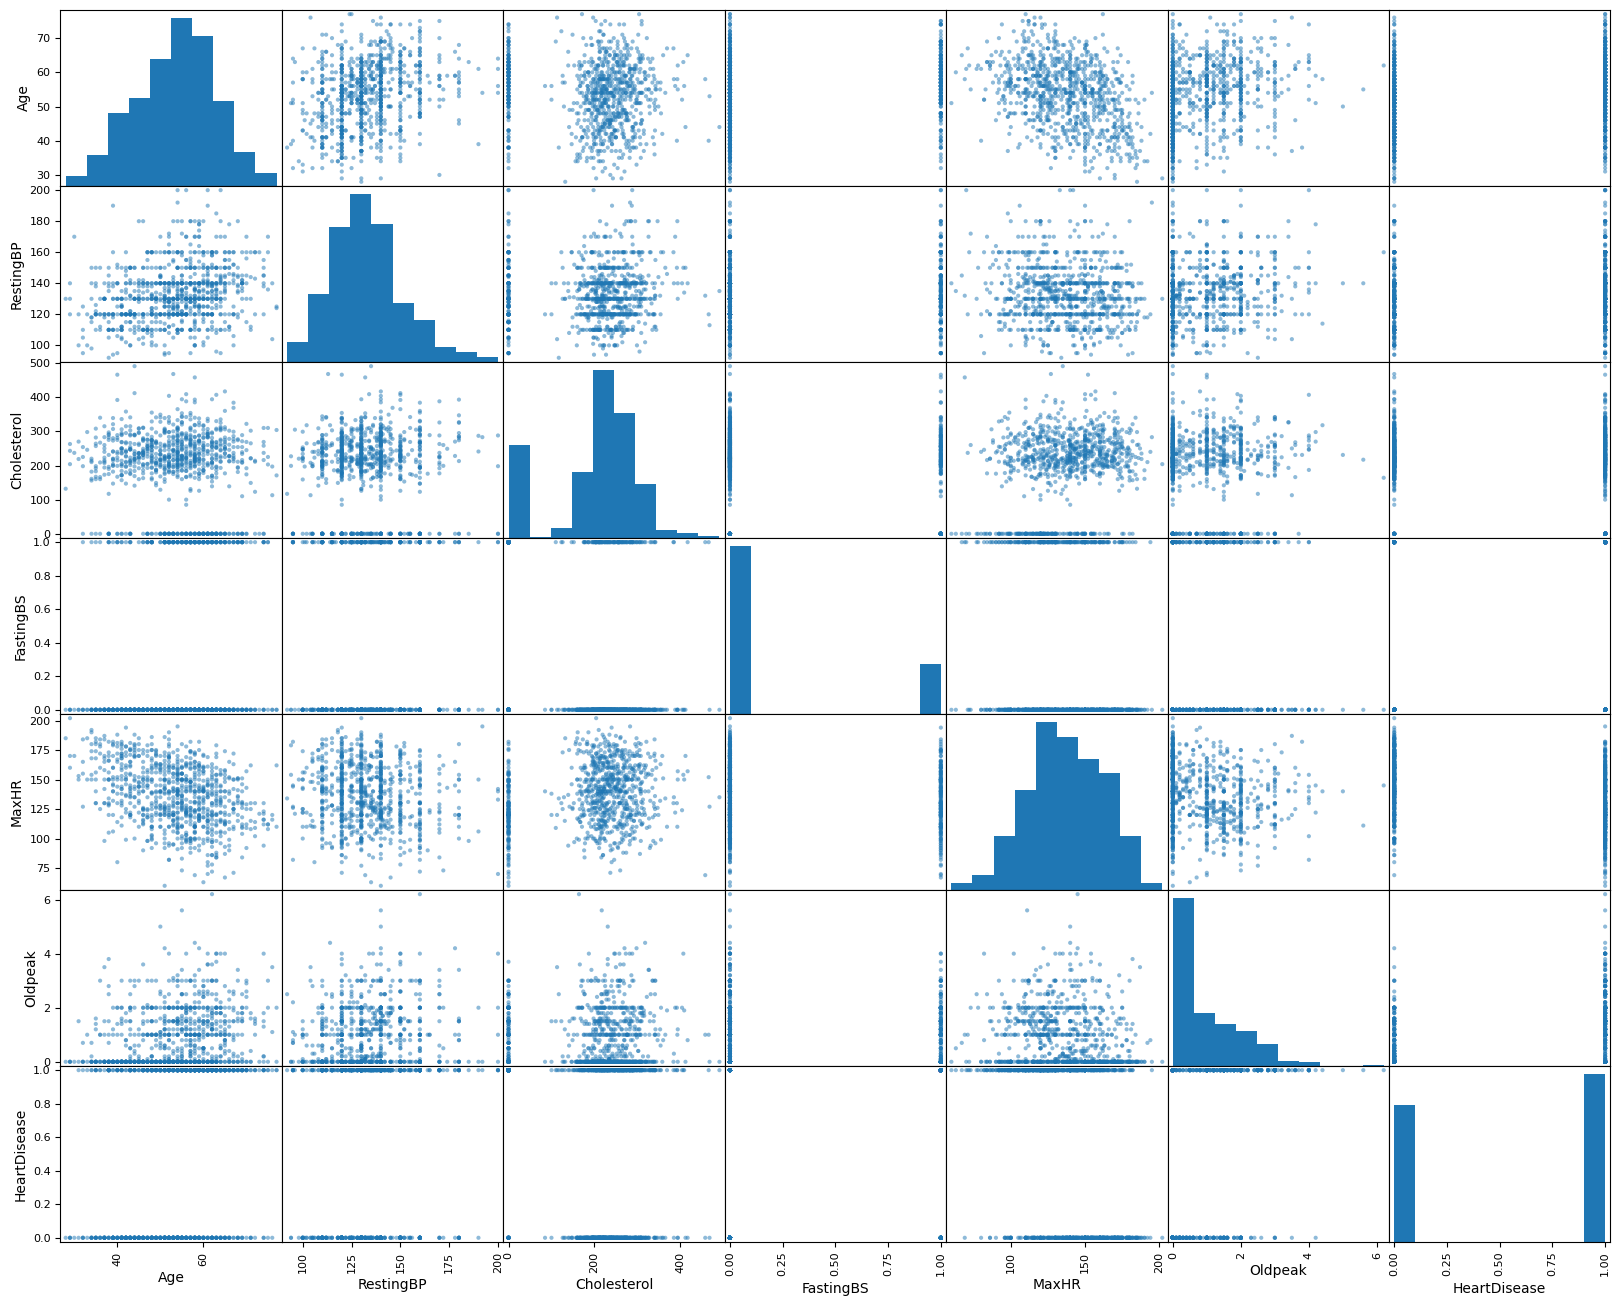

In [31]:
# scatter plots for numerical features
scatter_matrix(df_shuffled[numerical_columns], figsize=(20, 16))
plt.show()

### Correlations

In [32]:
df_shuffled.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.062090,-0.081449,0.265627,-0.099470,0.199557,-0.001870,-0.383335,0.218114,0.261293,-0.273039,0.286811
Sex,0.062090,1.000000,-0.127989,0.017160,-0.194378,0.115033,0.065404,-0.186875,0.194280,0.124081,-0.151451,0.304017
ChestPainType,-0.081449,-0.127989,1.000000,-0.013116,0.074683,-0.067245,-0.068204,0.288814,-0.349729,-0.182242,0.211569,-0.388034
RestingBP,0.265627,0.017160,-0.013116,1.000000,0.066450,0.082178,0.029888,-0.118281,0.154943,0.157130,-0.095998,0.120280
Cholesterol,-0.099470,-0.194378,0.074683,0.066450,1.000000,-0.257794,-0.191762,0.238928,-0.040169,0.012768,0.117598,-0.243899
FastingBS,0.199557,0.115033,-0.067245,0.082178,-0.257794,1.000000,0.087978,-0.120187,0.062277,0.084548,-0.175506,0.256494
RestingECG,-0.001870,0.065404,-0.068204,0.029888,-0.191762,0.087978,1.000000,-0.175223,0.079892,-0.006088,-0.009443,0.057193
MaxHR,-0.383335,-0.186875,0.288814,-0.118281,0.238928,-0.120187,-0.175223,1.000000,-0.373496,-0.183279,0.344581,-0.397956
ExerciseAngina,0.218114,0.194280,-0.349729,0.154943,-0.040169,0.062277,0.079892,-0.373496,1.000000,0.412962,-0.426705,0.502841
Oldpeak,0.261293,0.124081,-0.182242,0.157130,0.012768,0.084548,-0.006088,-0.183279,0.412962,1.000000,-0.528423,0.434436


#### PCC table

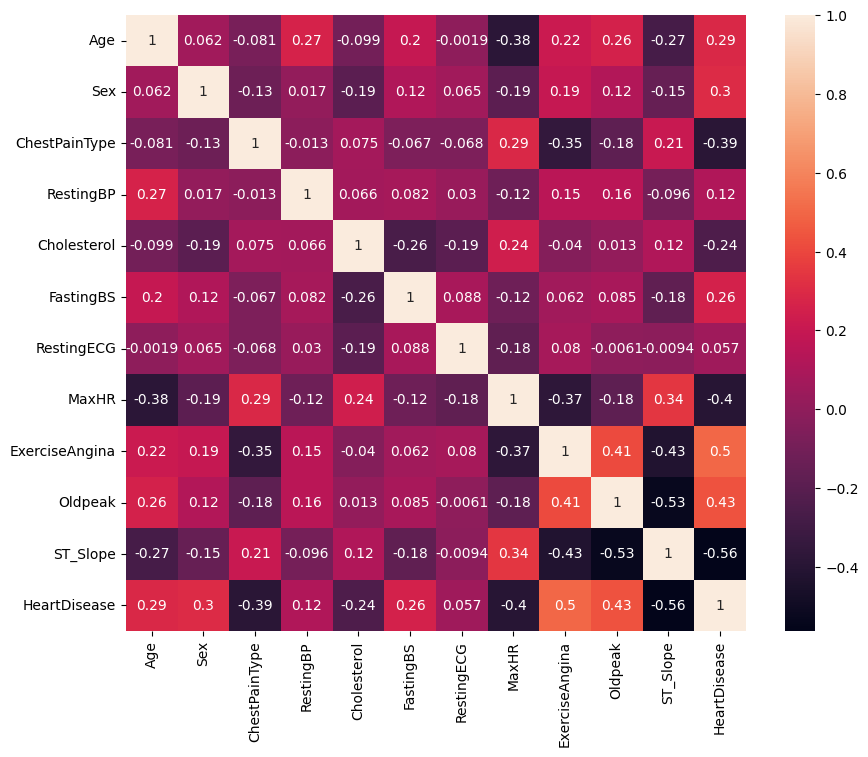

In [33]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df_shuffled.corr(method = 'pearson'), cbar = True, annot = True)
plt.show()

*   `ExerciseAngina` is the most correlated feature with `HeartDisease`. It seems like the most promising attribute to predict heart failure.
*  `Oldpeak` and `Sex` are also fairly correlated with `HeartDisease`.
* It is noteworthy that `Oldpeak` and `ExerciseAngina` are also fairly correlated to one another. This, actually, makes sense as a higher degree of ST depression during exercise (elevated `Oldpeak`) could be matched with an increased likelihood of experiencing exercise-induced angina.


### Splitting into training, validation and testing sets

In [34]:
strat_train_set, validation_and_test = train_test_split(df_shuffled, test_size=0.4, stratify=df_shuffled['HeartDisease'], random_state=42)

In [35]:
strat_validation_set, strat_test_set = train_test_split(validation_and_test, test_size=0.5, stratify=validation_and_test['HeartDisease'], random_state=42)

In [36]:
print(strat_train_set.shape)
print(strat_test_set.shape)
print(strat_validation_set.shape)

(539, 12)
(180, 12)
(180, 12)


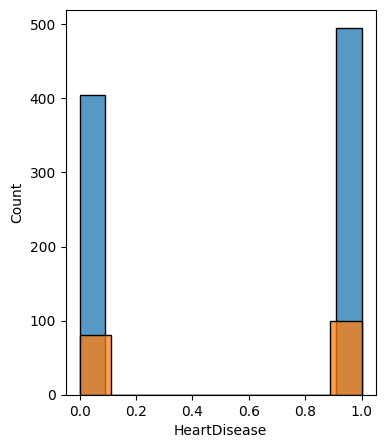

In [37]:
# test set representation of the whole dataset
fig, ax = plt.subplots(1, figsize = (4,5))
sns.histplot(df_shuffled['HeartDisease'], ax = ax)
sns.histplot(strat_test_set['HeartDisease'], ax = ax)
plt.show()

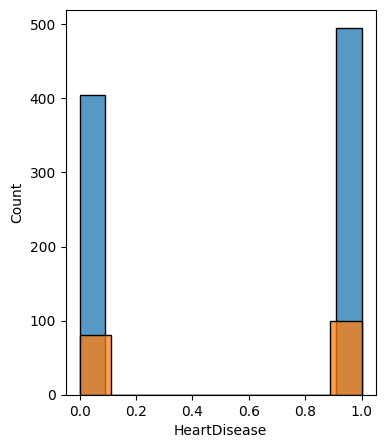

In [38]:
# validation set representation of the whole dataset
fig, ax = plt.subplots(1, figsize = (4,5))
sns.histplot(df_shuffled['HeartDisease'], ax = ax)
sns.histplot(strat_test_set['HeartDisease'], ax = ax)
plt.show()

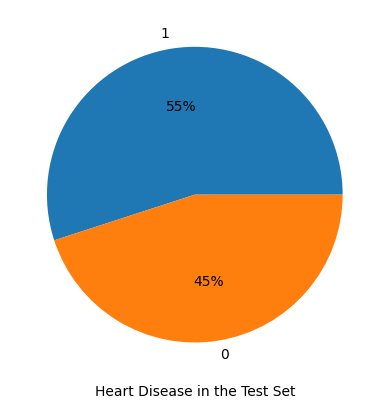

In [39]:
fig = plt.figure(1)
temp = strat_test_set['HeartDisease'].value_counts()
plt.pie(temp, labels = temp.index, autopct='%.0f%%')
plt.xlabel('Heart Disease in the Test Set')
plt.show()

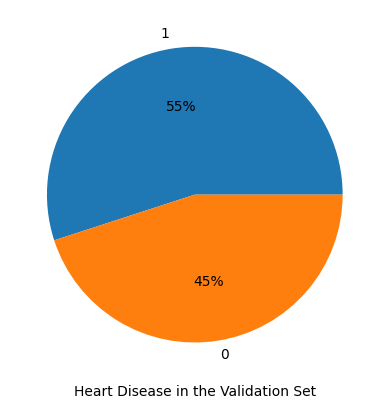

In [40]:
fig = plt.figure(1)
temp = strat_validation_set['HeartDisease'].value_counts()
plt.pie(temp, labels = temp.index, autopct='%.0f%%')
plt.xlabel('Heart Disease in the Validation Set')
plt.show()

In [41]:
strat_test_set["HeartDisease"].value_counts() / len(strat_test_set)

HeartDisease
1    0.55
0    0.45
Name: count, dtype: float64

In [42]:
strat_validation_set["HeartDisease"].value_counts() / len(strat_test_set)

HeartDisease
1    0.55
0    0.45
Name: count, dtype: float64

In [43]:
df_shuffled["HeartDisease"].value_counts() / len(df_shuffled)

HeartDisease
1    0.550612
0    0.449388
Name: count, dtype: float64

In [44]:
def HeartDisease_proportions(data):
    return data["HeartDisease"].value_counts() / len(data)

train_set, validation_and_test_set = train_test_split(df_shuffled, test_size=0.4, random_state=42)
validation_set, test_set = train_test_split(validation_and_test_set, test_size=0.5, random_state=42)

compare_props = pd.DataFrame({
    "Overall": HeartDisease_proportions(df_shuffled),
    "Stratified Test": HeartDisease_proportions(strat_test_set),
    "Stratified Validation": HeartDisease_proportions(strat_validation_set),
    "Random Test": HeartDisease_proportions(test_set),
    "Random Validation": HeartDisease_proportions(validation_set),
}).sort_index()
compare_props["Random Test %error"] = 100 * compare_props["Random Test"] / compare_props["Overall"] - 100
compare_props["Random Validation %error"] = 100 * compare_props["Random Validation"] / compare_props["Overall"] - 100
compare_props["Stratified Test %error"] = 100 * compare_props["Stratified Test"] / compare_props["Overall"] - 100
compare_props["Stratified Validation %error"] = 100 * compare_props["Stratified Validation"] / compare_props["Overall"] - 100


In [45]:
compare_props

,Overall,Stratified Test,Stratified Validation,Random Test,Random Validation,Random Test %error,Random Validation %error,Stratified Test %error,Stratified Validation %error
HeartDisease,,,,,,,,,
0,0.449388,0.45,0.45,0.472222,0.422222,5.081133,-6.045105,0.136139,0.136139
1,0.550612,0.55,0.55,0.527778,0.577778,-4.147026,4.933782,-0.111111,-0.111111


### Verification discussion

* The data is split into 60% for training and 40% combined for validation and testing. Then, the latter 40% is split into two equal sets of validation and training.
* To ensure that the test set and validation set are representative of the whole dataset, Stratified Sampling was used to create them.
* Stratifying the data based on `HeartDisease`can help maintain the class distribution and prevent of bias.
* Samples are picked from each `HeartDisease` class in proportion to its size vis-à-vis the whole dataset. This way, the test and validation sets will be representative of the dataset.
* The test set and validation set obtained using stratified sampling and the dataset show very close values in terms of the ratios of the unique `HeartDisease` values to the sizes of the sets. This is enough to verify that the test set and validation set are indeed representative of the entire dataset, and that the distribution of `HeartDisease` is maintained. For the sake of comparison (table above), the error rates of the stratified test and validation sets are far inferior to those of the randomly generated test and validation sets. This demonstrates the effect of stratified sampling in generating testing and training sets.


In [46]:
X_train = strat_train_set.drop("HeartDisease", axis=1)
y_train = strat_train_set["HeartDisease"].copy()

In [47]:
X_train.shape, y_train.shape

((539, 11), (539,))

In [48]:
X_val = strat_validation_set.drop("HeartDisease", axis=1)
y_val = strat_validation_set["HeartDisease"].copy()

In [49]:
X_val.shape, y_val.shape

((180, 11), (180,))

In [50]:
X_test = strat_test_set.drop("HeartDisease", axis=1)
y_test = strat_test_set["HeartDisease"].copy()

In [51]:
X_test.shape, y_test.shape

((180, 11), (180,))

In [52]:
# generic performance reporting
def performance(X_train, X_val, X_test, y_train, y_val, y_test, model):
  y_train_pred = model.predict(X_train)
  y_val_pred = model.predict(X_val)
  y_test_pred = model.predict(X_test)

  for i, pair in enumerate([(y_train, y_train_pred),
                            (y_val, y_val_pred),
                             (y_test, y_test_pred)]):
    if i == 0:
      print("TRAINING DATA PERFORMANCE")
      print()
    elif i == 1:
      print("VALIDATION DATA PERFORMANCE")
      print()
    else:
      print("TESTING DATA PERFORMANCE")
      print()

    fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix(pair[0], pair[1]),
                                    colorbar=False,
                                    show_absolute=True,
                                    show_normed=True)
    plt.show()
    print(classification_report(pair[0], pair[1]))

## Logistic Regression
Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations.

> Since there only 2 classes to predict, there is no need to use softmax regression as with binary classification it is effectively just plain logistic regression.

### Training

In [53]:
logistic_reg = LogisticRegression(random_state=42, max_iter=1000)
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Performance

TRAINING DATA PERFORMANCE



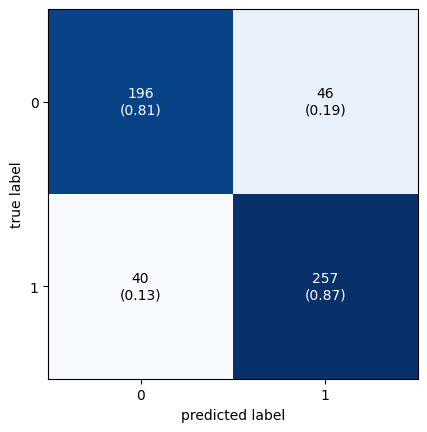

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       242
           1       0.85      0.87      0.86       297

    accuracy                           0.84       539
   macro avg       0.84      0.84      0.84       539
weighted avg       0.84      0.84      0.84       539

VALIDATION DATA PERFORMANCE



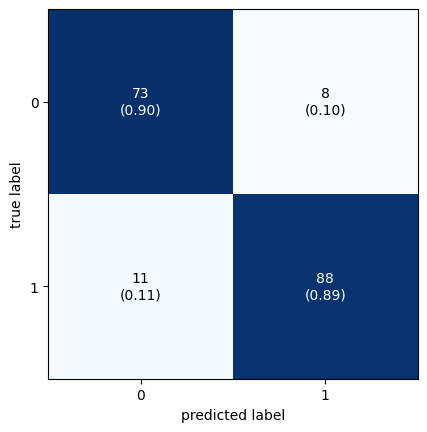

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        81
           1       0.92      0.89      0.90        99

    accuracy                           0.89       180
   macro avg       0.89      0.90      0.89       180
weighted avg       0.90      0.89      0.89       180

TESTING DATA PERFORMANCE



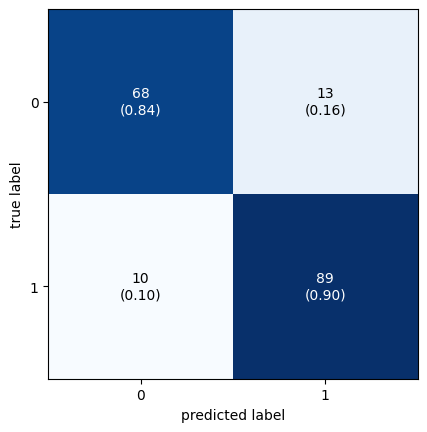

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        81
           1       0.87      0.90      0.89        99

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [54]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            logistic_reg)

### Hyperparameter tuning

In [59]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")

  grid_l2 = {'C' : np.logspace(-3,3,7),
             'penalty' : ['l2'],
             'max_iter': [100,1000,10000],
             'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky',
                        'sag', 'saga']}

  grid_l1 = {'C' : np.logspace(-3,3,7),
             'penalty' : ['l1'],
             'max_iter': [100,1000,10000],
             'solver': ['liblinear', 'saga']}


  grid_elastic = {'C' : np.logspace(-3,3,7),
                  'penalty' : ['elasticnet'],
                  'max_iter': [100,1000,10000],
                  'solver': ['saga']}

  grid_none = {'C' : np.logspace(-3,3,7),
               'penalty' : [None],
               'max_iter': [100,1000,10000],
               'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky',
                          'sag', 'saga']}

  grid = [grid_l2, grid_l1, grid_elastic, grid_none]

  logistic_reg_tuned = GridSearchCV(LogisticRegression(random_state = 42), grid)

  logistic_reg_tuned.fit(X_train, y_train)

  print("Best Parameters:", logistic_reg_tuned.best_params_)
  print("Best Score:", logistic_reg_tuned.best_score_)

Best Parameters: {'C': 1000.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.8347698165455174


In [60]:
grid_search_results = pd.DataFrame(logistic_reg_tuned.cv_results_)

In [61]:
grouped = grid_search_results.groupby('param_C')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_C
0.001       0.721962
0.010       0.775451
0.100       0.804820
1.000       0.808334
10.000      0.807805
100.000     0.807896
1000.000    0.808039
Name: mean_test_score, dtype: float64

In [62]:
grouped = grid_search_results.groupby('param_max_iter')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_max_iter
100      0.765701
1000     0.799560
10000    0.806585
Name: mean_test_score, dtype: float64

In [63]:
grouped = grid_search_results.groupby('param_penalty')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_penalty
elasticnet         NaN
l1            0.745829
l2            0.791317
Name: mean_test_score, dtype: float64

In [64]:
grouped = grid_search_results.groupby('param_solver')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_solver
lbfgs              0.817013
liblinear          0.785371
newton-cg          0.816348
newton-cholesky    0.816348
sag                0.776949
saga               0.751315
Name: mean_test_score, dtype: float64

*   A high C value (1000) implies that the model gives more weight to the training data. So, apparently there is no need for strong regularization.
*   A value of 100 for max_iter indicates that the model can converge to an optimal stable solution in 100 iterations or less.
* Ridge regularization is likely there to create a balance with the high value of C, and constrain the model so that it does not overfit.
* The 'lbfgs' solver ensures fast convergence and better performance, especially that the dataset is only medium-sized.



### Performance after hyperparamter tuning

TRAINING DATA PERFORMANCE



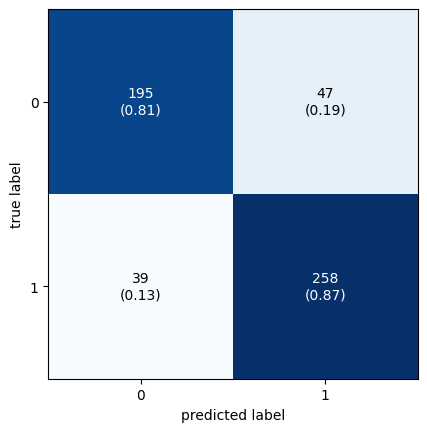

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       242
           1       0.85      0.87      0.86       297

    accuracy                           0.84       539
   macro avg       0.84      0.84      0.84       539
weighted avg       0.84      0.84      0.84       539

VALIDATION DATA PERFORMANCE



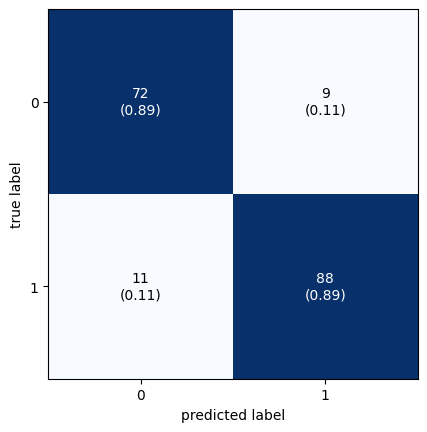

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        81
           1       0.91      0.89      0.90        99

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180

TESTING DATA PERFORMANCE



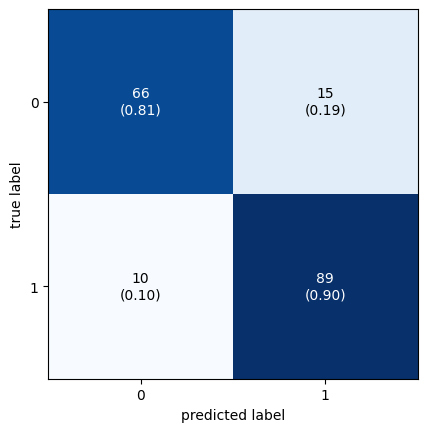

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        81
           1       0.86      0.90      0.88        99

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [66]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            logistic_reg_tuned)

## SVM
Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.

### Training

***Linear kernel SVC***

In [67]:
linear_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="linear", C=1))
    ])
linear_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, kernel='linear'))])

***Polynomial kernel SVC***

In [68]:
poly_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, C=100, gamma="auto"))
    ])
poly_svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=100, degree=2, gamma='auto', kernel='poly'))])

### Performance

***Linear kernel SVC***

TRAINING DATA PERFORMANCE



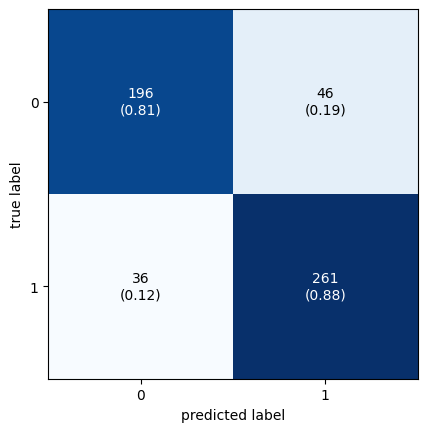

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       242
           1       0.85      0.88      0.86       297

    accuracy                           0.85       539
   macro avg       0.85      0.84      0.85       539
weighted avg       0.85      0.85      0.85       539

VALIDATION DATA PERFORMANCE



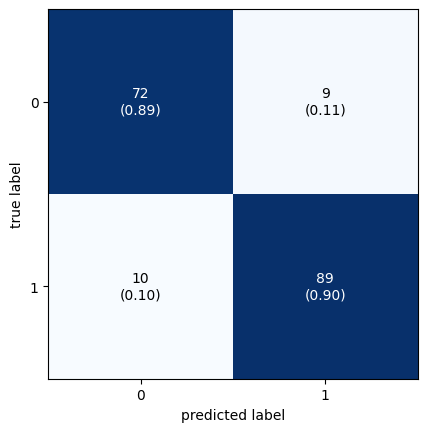

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        81
           1       0.91      0.90      0.90        99

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180

TESTING DATA PERFORMANCE



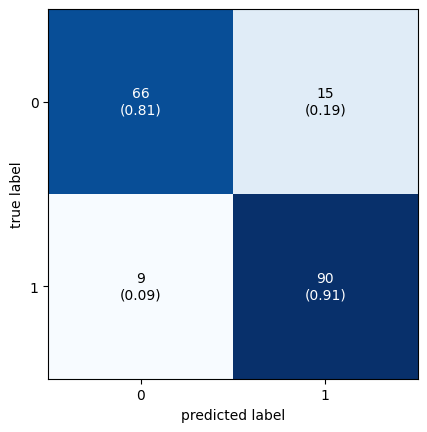

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        81
           1       0.86      0.91      0.88        99

    accuracy                           0.87       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.87      0.87       180



In [69]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            linear_svm_clf)

***Polynomial kernel SVC***

TRAINING DATA PERFORMANCE



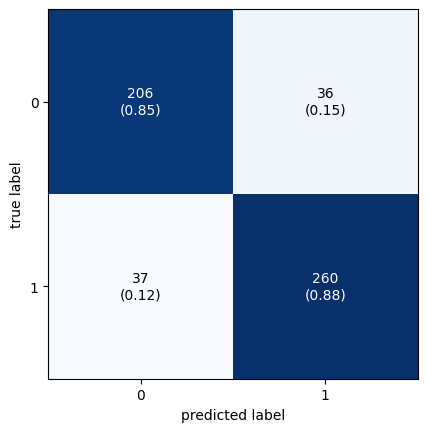

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       242
           1       0.88      0.88      0.88       297

    accuracy                           0.86       539
   macro avg       0.86      0.86      0.86       539
weighted avg       0.86      0.86      0.86       539

VALIDATION DATA PERFORMANCE



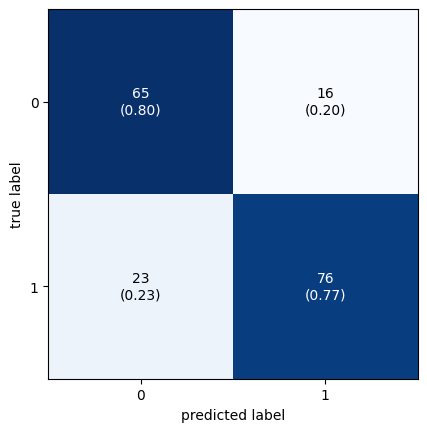

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        81
           1       0.83      0.77      0.80        99

    accuracy                           0.78       180
   macro avg       0.78      0.79      0.78       180
weighted avg       0.79      0.78      0.78       180

TESTING DATA PERFORMANCE



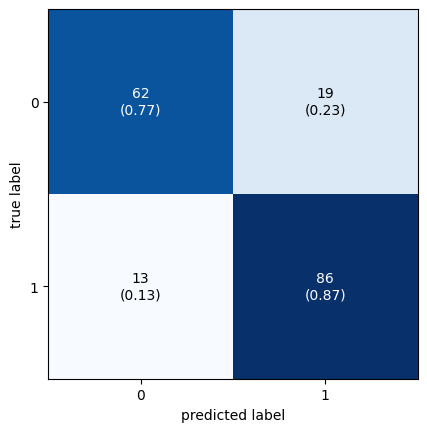

              precision    recall  f1-score   support

           0       0.83      0.77      0.79        81
           1       0.82      0.87      0.84        99

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180



In [70]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            poly_svm_clf)

*   The SVM classifier with the linear kernel seems to perform better than the one with the polynomial kernel.
*  Hyperparameter tuning, however, should have the final say and elect the best classifier.

### Hyperparameter tuning

*   Using grid search, we can explore the best SVM classifier and the hyperparameters that ought to go along with it.


In [76]:
c_values = [1, 10, 100]
gamma_values = [1, 0.1, 0.01]

svm_linear = {'svm_clf__C': c_values,
              'svm_clf__kernel': ['linear']}


svm_poly = {'svm_clf__C': c_values,
            'svm_clf__gamma': gamma_values,
            'svm_clf__degree': [2, 3],
            'svm_clf__kernel': ['poly']}

svm_others = {'svm_clf__C': c_values,
              'svm_clf__gamma': gamma_values,
              'svm_clf__kernel': ['rbf', 'sigmoid']}


clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(probability=True))
    ])

parameters = [svm_linear, svm_poly, svm_others]

svm_tuned = GridSearchCV(clf, param_grid=parameters)
svm_tuned.fit(X_train, y_train)

print("Best Parameters:", svm_tuned.best_params_)
print("Best Score:", svm_tuned.best_score_)

Best Parameters: {'svm_clf__C': 1, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}
Best Score: 0.8644686742817583


> Setting `probabilty=true` allows the SVC to provide probability estimates through Platt scaling, making it compatible with the soft voting approach.

### Performance after hyperparameter tuning

TRAINING DATA PERFORMANCE



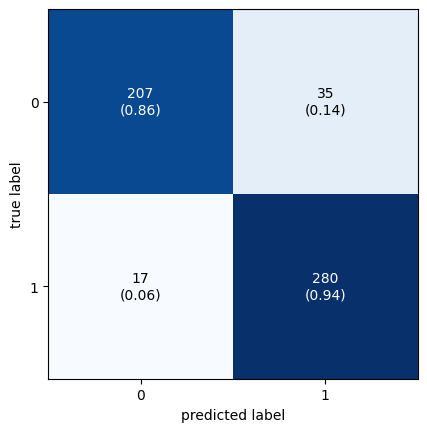

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       242
           1       0.89      0.94      0.92       297

    accuracy                           0.90       539
   macro avg       0.91      0.90      0.90       539
weighted avg       0.90      0.90      0.90       539

VALIDATION DATA PERFORMANCE



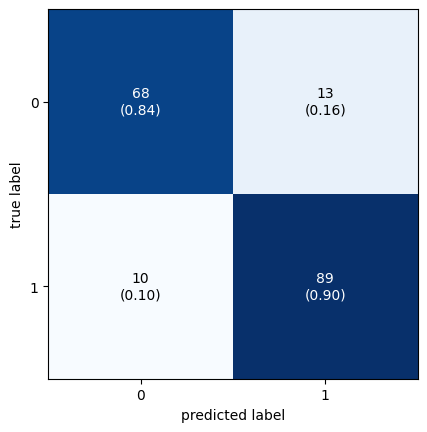

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        81
           1       0.87      0.90      0.89        99

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180

TESTING DATA PERFORMANCE



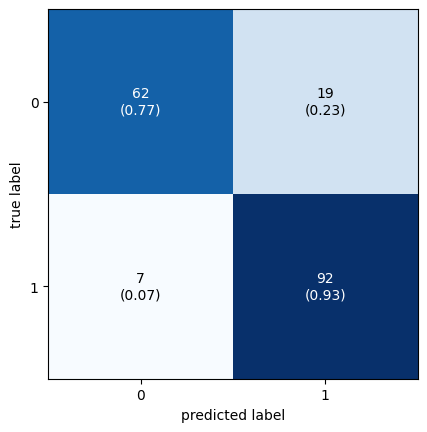

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        81
           1       0.83      0.93      0.88        99

    accuracy                           0.86       180
   macro avg       0.86      0.85      0.85       180
weighted avg       0.86      0.86      0.85       180



In [77]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            svm_tuned)

*   SVM classifier with the RBF kernel was found to be the best overall. It performs better than the classifiers with the linear kernel and polynomial kernel that were first adopted.
*   Using the RBF kernel suggests that the data is not linearly separable, and that it is better suited for a non-linear decision boundary. So, RBF can map it to a higher dimensional space.
* A low C value regularizes moderately so that it does not overfit the training data. The exact same thing can be said about the value of gamma as it enables the model to capture the complexity of the data without overfitting.

## Random Forest
Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.

### Training

In [78]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

### Performance

TRAINING DATA PERFORMANCE



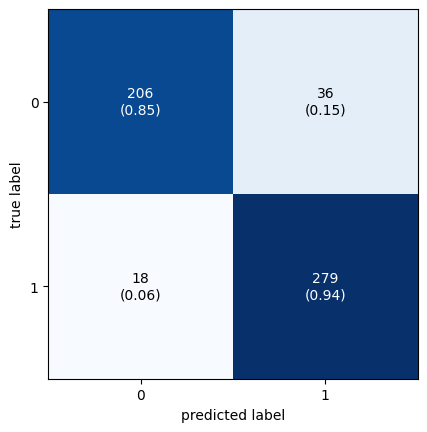

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       242
           1       0.89      0.94      0.91       297

    accuracy                           0.90       539
   macro avg       0.90      0.90      0.90       539
weighted avg       0.90      0.90      0.90       539

VALIDATION DATA PERFORMANCE



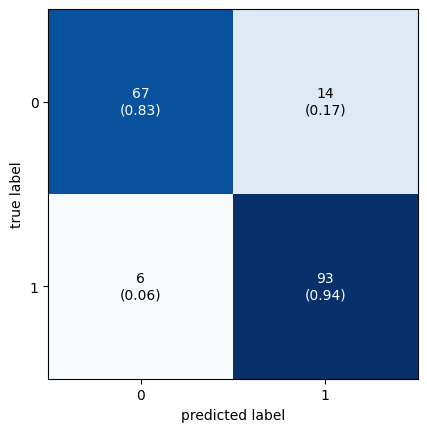

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        81
           1       0.87      0.94      0.90        99

    accuracy                           0.89       180
   macro avg       0.89      0.88      0.89       180
weighted avg       0.89      0.89      0.89       180

TESTING DATA PERFORMANCE



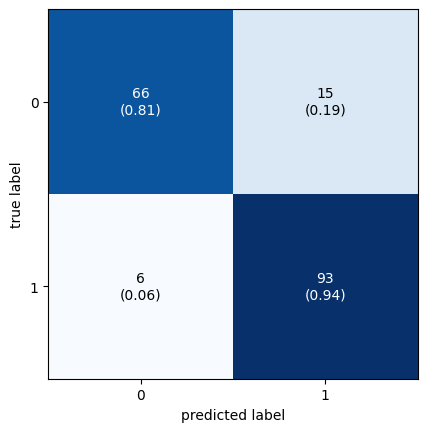

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        81
           1       0.86      0.94      0.90        99

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180



In [79]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            rnd_clf)

### Hyperparameter tuning

In [82]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4],
}
rnd_clf = RandomForestClassifier()
grid_search = GridSearchCV(rnd_clf, param_grid)
grid_search.fit(X_train, y_train)  # Replace X and y with your data and labels

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.8700588438906196


In [84]:
cv_res = pd.DataFrame(grid_search.cv_results_)
tuning_random_forest = cv_res[['param_max_depth',	'param_min_samples_leaf',	'param_min_samples_split',	'param_n_estimators', 'mean_test_score']]

In [85]:
grouped = tuning_random_forest.groupby('param_max_depth')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_max_depth
2     0.843429
4     0.858551
6     0.862112
8     0.861849
10    0.861491
Name: mean_test_score, dtype: float64

In [86]:
grouped = tuning_random_forest.groupby('param_min_samples_leaf')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_min_samples_leaf
1    0.857210
2    0.858550
4    0.858392
Name: mean_test_score, dtype: float64

In [87]:
grouped = tuning_random_forest.groupby('param_min_samples_split')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_min_samples_split
2    0.857853
5    0.858369
7    0.857930
Name: mean_test_score, dtype: float64

In [88]:
grouped = tuning_random_forest.groupby('param_n_estimators')
grouped_means = grouped['mean_test_score'].mean()
grouped_means

param_n_estimators
50     0.855542
100    0.857881
200    0.859427
300    0.859352
Name: mean_test_score, dtype: float64

### Performance after hyperparameter tuning

TRAINING DATA PERFORMANCE



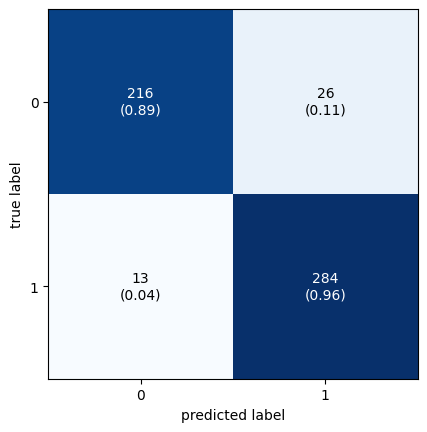

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       242
           1       0.92      0.96      0.94       297

    accuracy                           0.93       539
   macro avg       0.93      0.92      0.93       539
weighted avg       0.93      0.93      0.93       539

VALIDATION DATA PERFORMANCE



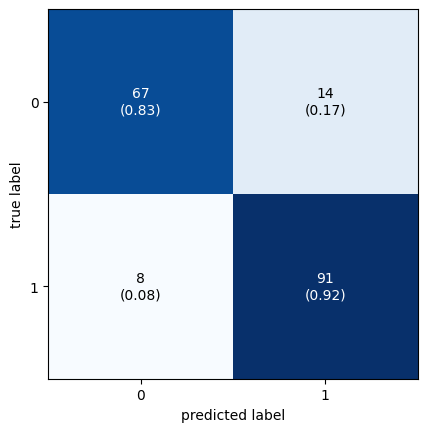

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        81
           1       0.87      0.92      0.89        99

    accuracy                           0.88       180
   macro avg       0.88      0.87      0.88       180
weighted avg       0.88      0.88      0.88       180

TESTING DATA PERFORMANCE



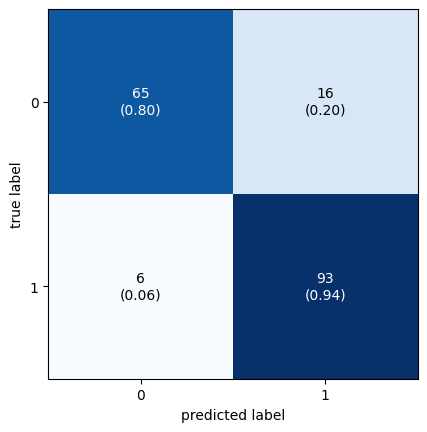

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        81
           1       0.85      0.94      0.89        99

    accuracy                           0.88       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.88      0.88      0.88       180



In [90]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            grid_search)

* The optimal number of decision trees in the Random Forest is 50, which can balance model performance and computational efficiency.
* Limiting the maximum depth to 6 can prevent overfitting and foster better generalization.
* The value of 5 for min_samples_split helps control the growth of trees, preventing them from becoming too complex and overfitting the training data. The same can be said about min_samples_leaf as it ensures that each leaf has a minimum amount of samples.

### Feature importance

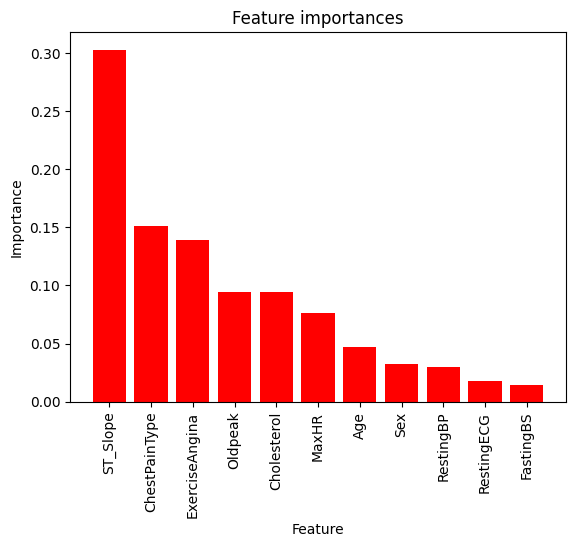

In [100]:
feature_names = X_train.columns

random_forest_best = RandomForestClassifier(max_leaf_nodes=16, max_depth = 8, min_samples_leaf = 1,
                                min_samples_split = 2, n_estimators = 50, n_jobs=-1, random_state=42)
random_forest_best.fit(X_train, y_train)
                       
importances = random_forest_best.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation='vertical')  # Labeling the x-axis with feature names
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

## Hard voting

In [103]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  voting_clf_hard = VotingClassifier(
      estimators=[('Logistic Regression', logistic_reg_tuned),
       ('Random Forest', grid_search),
        ('SVM', svm_tuned)],
      voting='hard')
  voting_clf_hard.fit(X_train, y_train)

TRAINING DATA PERFORMANCE



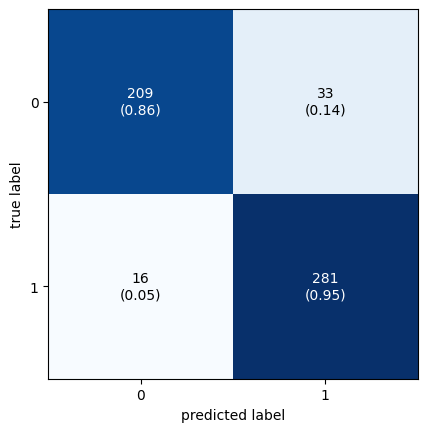

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       242
           1       0.89      0.95      0.92       297

    accuracy                           0.91       539
   macro avg       0.91      0.90      0.91       539
weighted avg       0.91      0.91      0.91       539

VALIDATION DATA PERFORMANCE



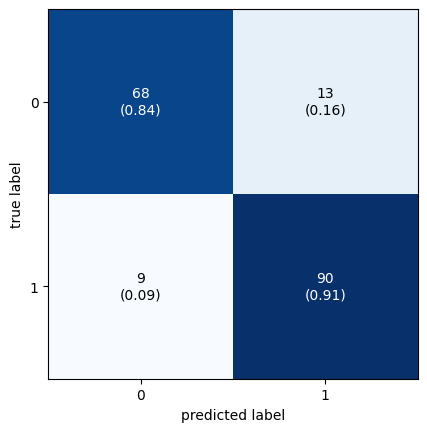

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        81
           1       0.87      0.91      0.89        99

    accuracy                           0.88       180
   macro avg       0.88      0.87      0.88       180
weighted avg       0.88      0.88      0.88       180

TESTING DATA PERFORMANCE



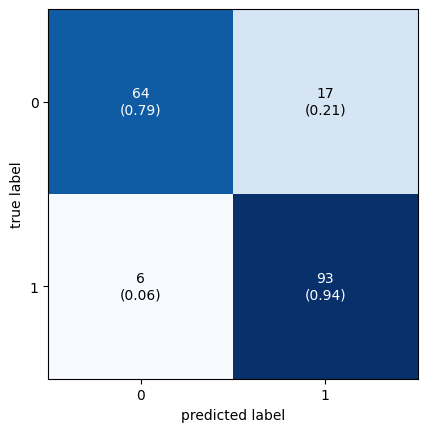

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        81
           1       0.85      0.94      0.89        99

    accuracy                           0.87       180
   macro avg       0.88      0.86      0.87       180
weighted avg       0.88      0.87      0.87       180



In [104]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            voting_clf_hard)

## Soft voting

In [105]:
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  voting_clf_soft = VotingClassifier(
      estimators=[('Softmax Regression', logistic_reg_tuned),
                  ('Random Forest', grid_search),
                  ('SVM', svm_tuned)], voting='soft')
  voting_clf_soft.fit(X_train, y_train)

TRAINING DATA PERFORMANCE



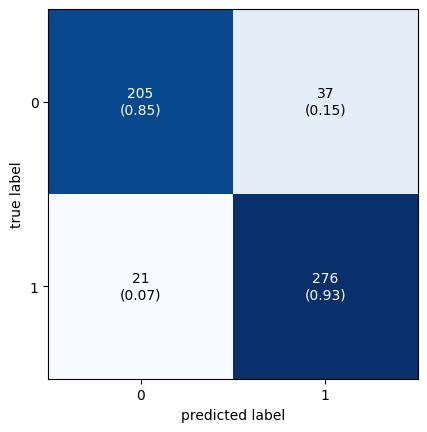

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       242
           1       0.88      0.93      0.90       297

    accuracy                           0.89       539
   macro avg       0.89      0.89      0.89       539
weighted avg       0.89      0.89      0.89       539

VALIDATION DATA PERFORMANCE



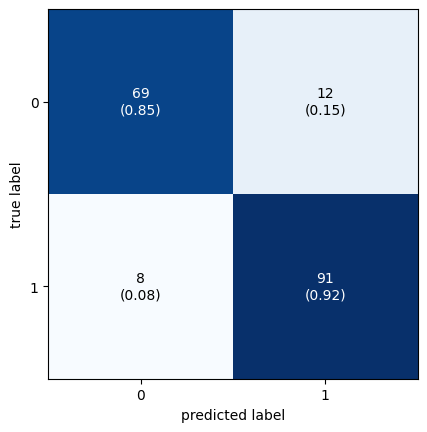

              precision    recall  f1-score   support

           0       0.90      0.85      0.87        81
           1       0.88      0.92      0.90        99

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180

TESTING DATA PERFORMANCE



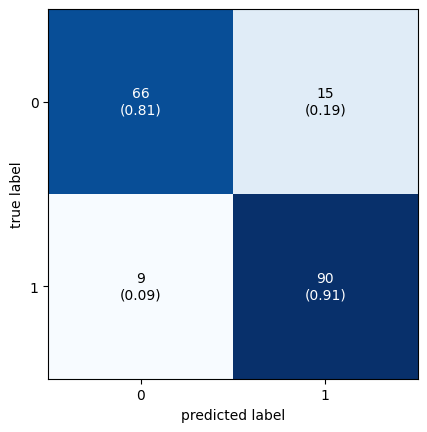

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        81
           1       0.86      0.91      0.88        99

    accuracy                           0.87       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.87      0.87       180



In [106]:
performance(X_train,
            X_val,
            X_test,
            y_train,
            y_val,
            y_test,
            voting_clf_soft)

## Discussion and Future Work

*   Individual classifiers; Softmax Regression, SVM, and Random Forest, yielded an average performance, measure by the f1 score, of about 85% each.
* In an attempt to improve the score, ensemble learning is used. The hard voting classifier attained a score of 87% as it was influenced mostly by Random Forest and Logistic Regression that were more confident in their predictions. The soft voting classifier, likewise, scored around 87% as it averaged the probability estimations of the classifiers.
* The best accuracy overall was 87% accuracy obtained through the voting classifiers. This suggests that the combined predictions of the individual classifiers were most reliable.
* Towards improving the accuracy, future work would touch upon understanding the dataset even better and treating all outliers, performing feature selection, and delving even deeper with ensemble learning and exploring stacking and boosting among other methods.